In [3]:
from pycbc import conversions
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from pycbc import conversions,detector
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)
import matplotlib.colors as colors

In [4]:
mass = np.linspace(35,140,100)
spin = np.linspace(0,0.99)
X, Y = np.meshgrid(mass,spin)

In [5]:
tau = conversions.tau_from_final_mass_spin(X,Y,2,2,1)
taums = tau * 1000

In [6]:
tau

array([[0.00062936, 0.00064844, 0.00066751, ..., 0.00247931, 0.00249838,
        0.00251746],
       [0.00062997, 0.00064906, 0.00066815, ..., 0.00248171, 0.0025008 ,
        0.00251989],
       [0.00063062, 0.00064973, 0.00066884, ..., 0.00248425, 0.00250336,
        0.00252247],
       ...,
       [0.00107677, 0.0011094 , 0.00114203, ..., 0.00424184, 0.00427447,
        0.0043071 ],
       [0.0012791 , 0.00131786, 0.00135662, ..., 0.00503889, 0.00507765,
        0.00511641],
       [0.00195511, 0.00201435, 0.0020736 , ..., 0.00770193, 0.00776118,
        0.00782042]])

In [7]:
np.min(tau)

0.0006293640888125093

In [8]:
1/np.min(tau)

1588.905401143574

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """
/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


Text(0, 0.5, 'Final Spin')

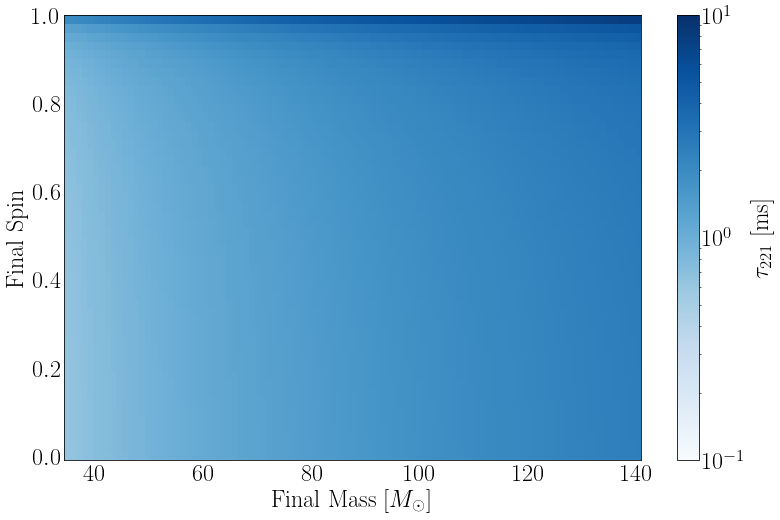

In [9]:
# plot
plt.style.use('_mpl-gallery-nogrid')
mpl.rcParams.update(params)
fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, taums,  norm=colors.LogNorm(vmin=0.1, vmax=10))
fig.colorbar(im,label=r'$\tau_{221}$ [ms]')
ax.set_xlabel('Final Mass $[M_\odot]$')
ax.set_ylabel('Final Spin')

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  
/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  from ipykernel import kernelapp as app


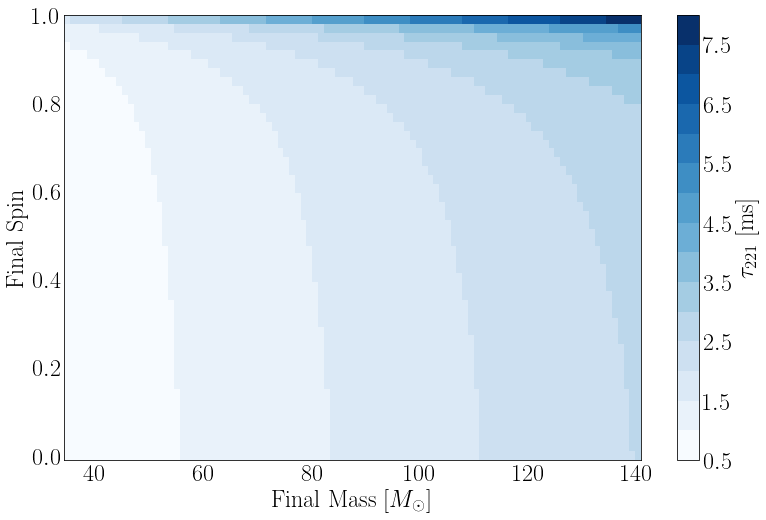

In [13]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# plot
levels = MaxNLocator(nbins=15).tick_values(taums.min(), taums.max())

#plt.style.use('_mpl-gallery-nogrid')
mpl.rcParams.update(params)

cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, taums,  norm=norm)
fig.colorbar(im,label=r'$\tau_{221}$ [ms]')
ax.set_xlabel('Final Mass $[M_\odot]$')
ax.set_ylabel('Final Spin')
fig.savefig('tau.pdf',bbox_inches='tight')

In [7]:
p = '/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/GW150914_095045-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf'
maxl_det_time(p,det='H1')

1126259462.4237013

In [7]:
import pylab

In [5]:
p = '/work/yifan.wang/4ogc/release_prod/convertsnr/1212_posterior/GW200224_222234-PYCBC-POSTERIOR-IMRPhenomXPHM.hdf'

In [14]:
t = det_time(p)
tpeak = maxl_det_time(p)
bins = np.linspace(np.min(t),np.max(t),100)

In [8]:
tligo = np.loadtxt('./LVKringdownfile/pyRing_PE_inputs/Peak_time_data/GW200224B_L1_peaktime_GWrec_point_estimate_IMRPhenomXPHM_median_10000_Prod5_5e35103b166e0561c2e2d6e0c62754071980bc5f.dat')

In [19]:
tligodist = np.loadtxt('./LVKringdownfile/pyRing_PE_inputs/Peak_time_data/L1_peaktime_GWrec_posterior_GW200224B_IMRPhenomXPHM_10000_Prod5_5e35103b166e0561c2e2d6e0c62754071980bc5f.dat')

In [18]:
tligo[0]

1266618172.394937

In [17]:
tpeak

1266618172.3949018

In [22]:
binsligo=np.linspace(np.min(tligodist),np.max(tligodist),100)

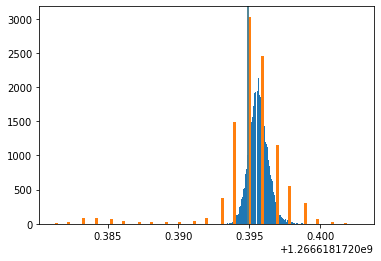

In [23]:
pylab.hist(t,bins=bins)
pylab.hist(tligodist,bins=binsligo)
pylab.axvline(tligo[0],color='orange')
pylab.axvline(tpeak)

In [25]:
maxl_det_time(p,det='H1')

1266618172.3966918

In [26]:
tligoh1 = np.loadtxt('./LVKringdownfile/pyRing_PE_inputs/Peak_time_data/GW200224B_H1_peaktime_GWrec_point_estimate_IMRPhenomXPHM_median_10000_Prod5_5e35103b166e0561c2e2d6e0c62754071980bc5f.dat')

In [27]:
tligoh1[0]

1266618172.3968902

In [28]:
f=h5py.File(p)
ii = np.argmax(f['samples']['loglikelihood'][:])

In [29]:
f['samples']['delta_tc'][ii]+f.attrs['trigger_time']

1266618172.381057

In [30]:
f['samples']['ra'][ii]

3.0208791224723215

In [31]:
f['samples']['dec'][ii]

-0.1118497461651865